# Importação e tratamento dos dados I

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
base = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [4]:
base.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
base = base.drop('Serial No.', axis=1)

In [7]:
base.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
base.columns = base.columns.str.rstrip()

# Visualização dos dados

C:\Users\Ramon Soares\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Ramon Soares\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


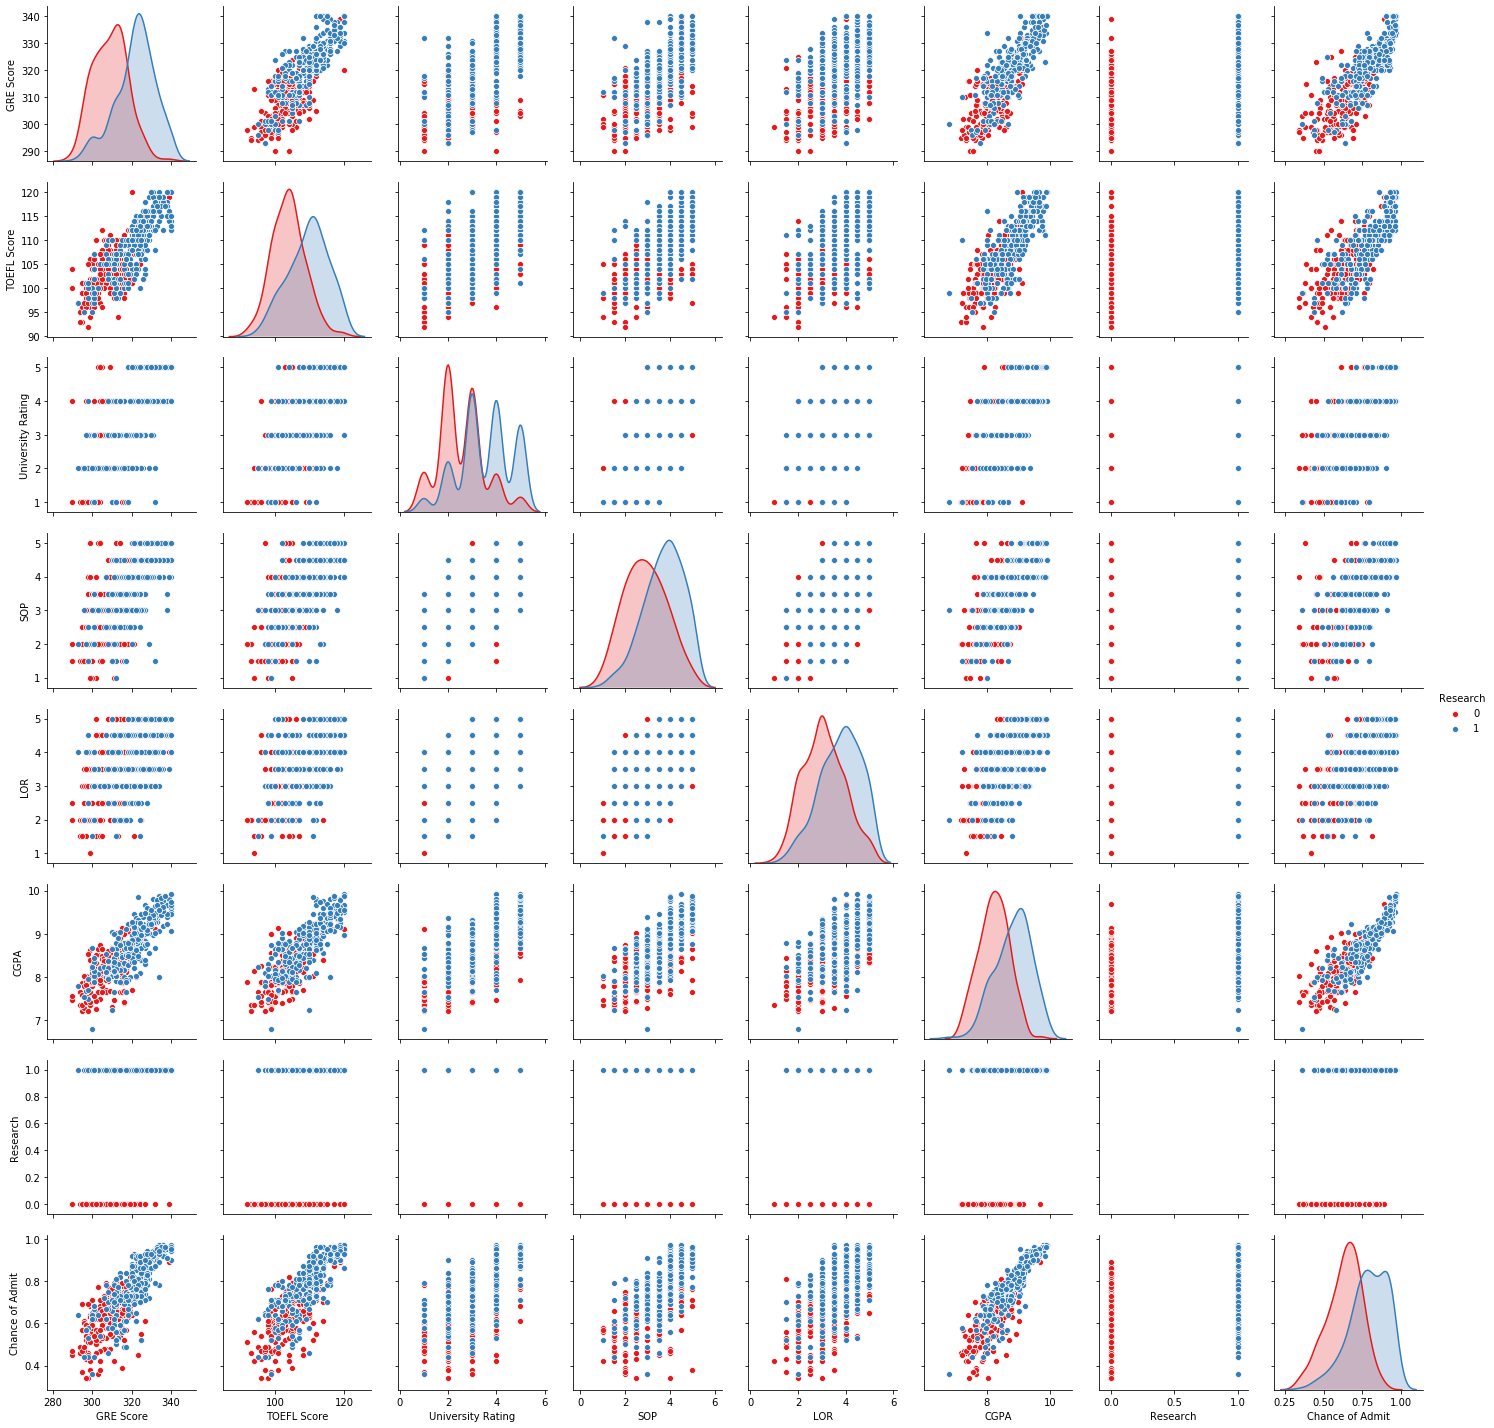

In [9]:
sns.pairplot(base, hue = 'Research', palette = 'Set1')

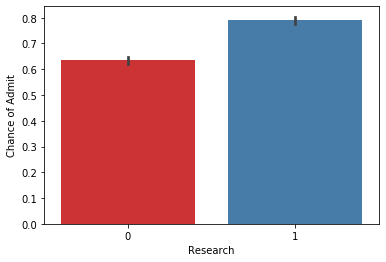

In [10]:
sns.barplot(x = 'Research', y ='Chance of Admit', data = base, palette = 'Set1')

Nos gráficos acima percebemos que 'Chance of Admit' está diretamente ligado com 'GRE Score', 'TOEFL Score' e 'CGPA', além de que quem fez pesquisa, tem mais chances de admissão.

# Treinamento para 'Research'

## Árvore de Decisão I

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = base.drop('Research',axis=1)
y = base['Research']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 101)

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dtree = DecisionTreeClassifier()

In [16]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
predictions = dtree.predict(X_test)

In [19]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72        60
           1       0.74      0.77      0.75        65

    accuracy                           0.74       125
   macro avg       0.74      0.73      0.73       125
weighted avg       0.74      0.74      0.74       125



In [20]:
print(confusion_matrix(y_test,predictions))

[[42 18]
 [15 50]]


## Floresta Aleatória I

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
rfc_pred = rfc.predict(X_test)

In [23]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77        60
           1       0.78      0.82      0.80        65

    accuracy                           0.78       125
   macro avg       0.78      0.78      0.78       125
weighted avg       0.78      0.78      0.78       125



In [24]:
print(confusion_matrix(y_test,rfc_pred))

[[45 15]
 [12 53]]


# Treinamento para 'Chance of Admit'

In [25]:
X = base.drop('Chance of Admit', axis=1)
y = base['Chance of Admit']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

Para utilizar o método de classificação para 'Chance of Admit', consideraremos que se a chance de admissão for superior a 75%, será 1, se não, será 0.

In [47]:
y_train = [1 if each > 0.75 else 0 for each in y_train]
y_test  = [1 if each > 0.75 else 0 for each in y_test]

## Árvore de Decisão II

In [48]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [49]:
predictions = dtree.predict(X_test)

In [50]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        81
           1       0.88      0.86      0.87        44

    accuracy                           0.91       125
   macro avg       0.91      0.90      0.90       125
weighted avg       0.91      0.91      0.91       125



In [51]:
print(confusion_matrix(y_test,predictions))

[[76  5]
 [ 6 38]]


## Floresta Aleatória II

In [52]:
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
rfc_pred = rfc.predict(X_test)

In [54]:
print(confusion_matrix(y_test,rfc_pred))

[[77  4]
 [ 2 42]]


In [55]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        81
           1       0.91      0.95      0.93        44

    accuracy                           0.95       125
   macro avg       0.94      0.95      0.95       125
weighted avg       0.95      0.95      0.95       125

